In [3]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [4]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [8]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [9]:
df.sample(5)

,Survived,Age,Fare
545,0,64.000000,26.000
772,0,57.000000,10.500
40,0,40.000000,9.475
888,0,29.699118,23.450
837,0,29.699118,8.050


In [10]:
X=df.iloc[:,1:3]
Y=df.iloc[:,0]

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

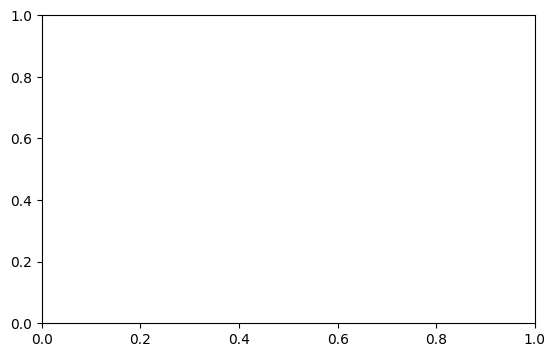

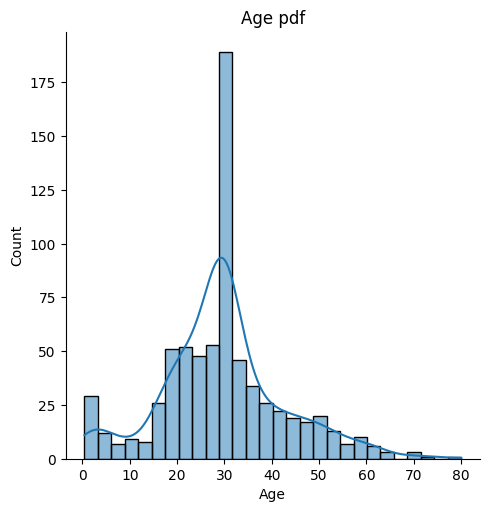

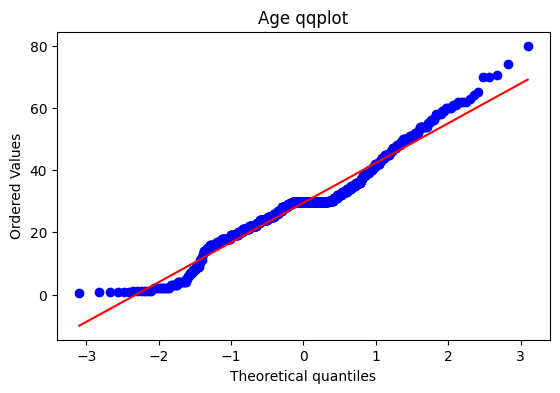

In [12]:

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.displot(X_train['Age'],kde=True)
plt.title('Age pdf')


plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age qqplot')
plt.show()

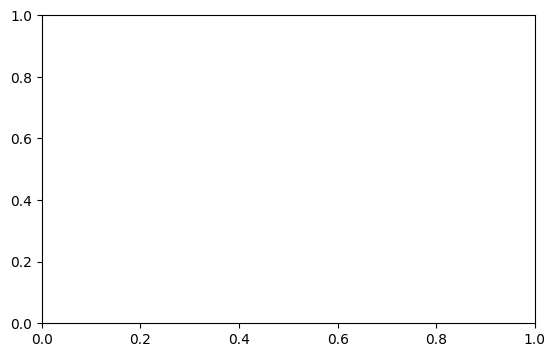

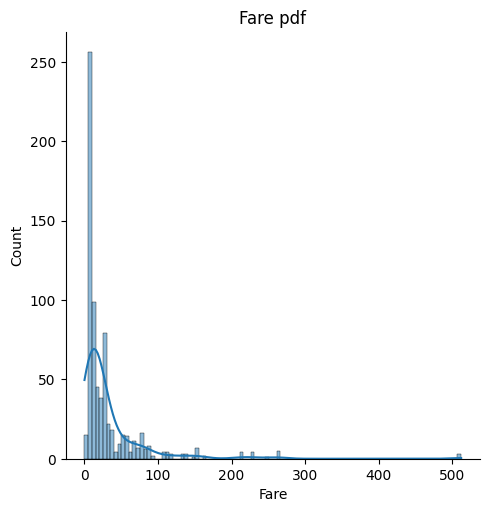

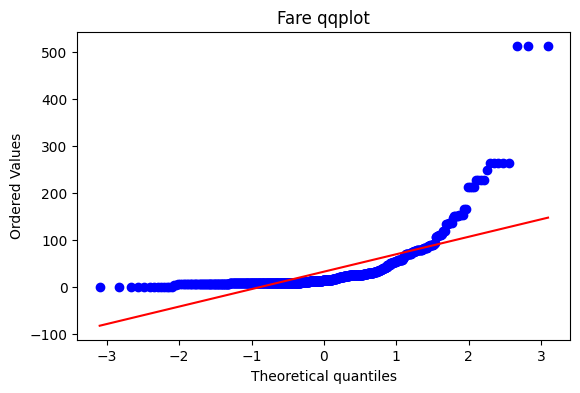

In [13]:

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.displot(X_train['Fare'],kde=True)
plt.title('Fare pdf')


plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare qqplot')
plt.show()

In [14]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [15]:
clf.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [16]:
y_pred=clf.predict(X_test)
y_pred2=clf2.predict(X_test)

In [17]:
print("Accuracy LR",accuracy_score(Y_test,y_pred))
print("Accuracy DT",accuracy_score(Y_test,y_pred2))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6759776536312849


In [18]:
trf=FunctionTransformer(func=np.log1p)

In [19]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [20]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed,Y_train)
clf2.fit(X_train_transformed,Y_train)

y_pred=clf.predict(X_test_transformed)
y_pred2=clf2.predict(X_test_transformed)

print("Accuracy LR",accuracy_score(Y_test,y_pred))
print("Accuracy DT",accuracy_score(Y_test,y_pred2))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6871508379888268


In [21]:
X_transformed=trf.fit_transform(X)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,Y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,Y,scoring='accuracy',cv=10)))


LR

 0.678027465667915
DT 0.6566292134831462


In [22]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')
X_train_transformed=trf2.fit_transform(X_train)
X_test_transformed=trf2.transform(X_test)

In [23]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed,Y_train)
clf2.fit(X_train_transformed,Y_train)       

y_pred=clf.predict(X_test_transformed)
y_pred2=clf2.predict(X_test_transformed)

print("Accuracy LR",accuracy_score(Y_test,y_pred))
print("Accuracy DT",accuracy_score(Y_test,y_pred2))



Accuracy LR 0.6703910614525139
Accuracy DT 0.6871508379888268


In [24]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6195131086142323


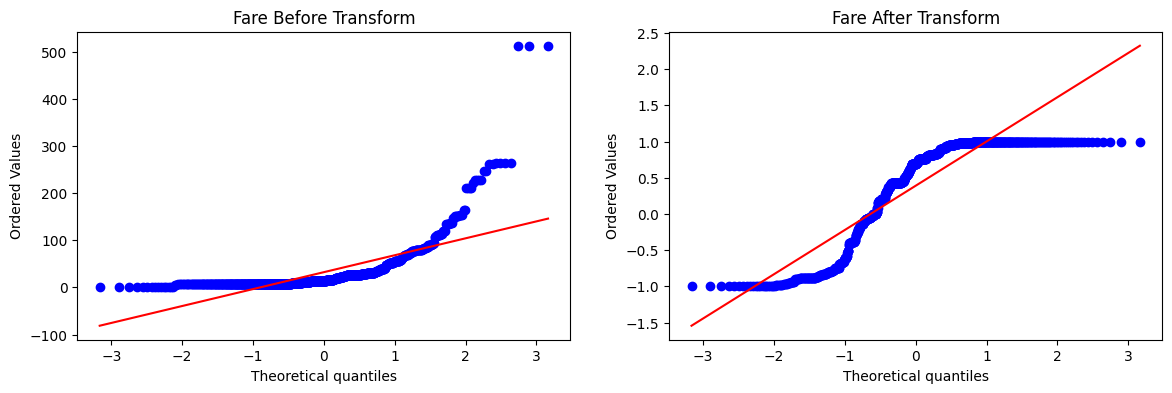

In [25]:
apply_transform(np.sin)

Accuracy 0.6611485642946316


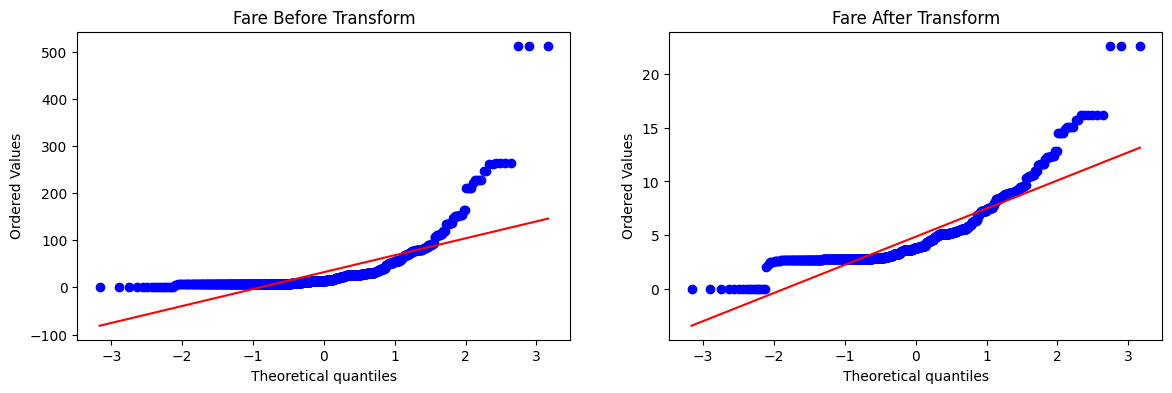

In [26]:
apply_transform(np.sqrt)    